In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# prinitng 5 number summary, basic info about the data
data_summary = data.describe()
data_summary.to_csv("data_summary.csv")
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# X -> Features & y -> Output Label 
X = data.drop(columns=["fractal_dimension_worst"])
y = data['fractal_dimension_worst']
print(X.shape)
print(y.shape)

(569, 31)
(569,)


In [7]:
# Generate binary target variable based on diagnosis column
data['target'] = (data['fractal_dimension_worst'] == 'M').astype(int)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
X = data.drop(columns=["fractal_dimension_worst","diagnosis"])
y = data['diagnosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

print(X_train.shape)
print(X_test.shape)

(426, 31)
(143, 31)


In [9]:
DT = DecisionTreeClassifier(max_depth=4, criterion='entropy')
DT.fit(X_train, y_train)
dt_pred = DT.predict(X_test)
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))

Accuracy: 0.9230769230769231
Confusion Matrix:
 [[81  9]
 [ 2 51]]


In [10]:
print('Accuracy score of the Decision Tree model is {:.2f}%'.format(accuracy_score(dt_pred, y_test)*100))
print('F1 score of the Decision Tree model is {}'.format(f1_score(dt_pred, y_test)))

Accuracy score of the Decision Tree model is 92.31%
F1 score of the Decision Tree model is 0.9026548672566371


In [11]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_pred = KNN.predict(X_test)

In [12]:
print('Accuracy score of the K-Nearest Neighbors model is {:.2f}%'.format(accuracy_score(y_test, knn_pred)*100))
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_pred)))

Accuracy score of the K-Nearest Neighbors model is 76.92%
F1 score of the K-Nearest Neighbors model is 0.5925925925925926


In [13]:
confusion_matrix(y_test, knn_pred, labels = [0, 1])

array([[86,  4],
       [29, 24]], dtype=int64)

In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [15]:
print('Accuracy score of the Logistic Regression model is {:.2f}%'.format(accuracy_score(y_test, lr_yhat)*100))
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))


Accuracy score of the Logistic Regression model is 62.94%
F1 score of the Logistic Regression model is 0.0


In [16]:
confusion_matrix(y_test, lr_yhat, labels = [0, 1])

array([[90,  0],
       [53,  0]], dtype=int64)

In [17]:
svm = SVC() 
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [18]:
print('Accuracy score of the Support Vector Machines model is {:.2f}%'.format(accuracy_score(y_test, svm_yhat)*100))
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(y_test, svm_yhat)))

Accuracy score of the Support Vector Machines model is 62.94%
F1 score of the Support Vector Machines model is 0.0


In [19]:
confusion_matrix(y_test, svm_yhat, labels = [0, 1])

array([[90,  0],
       [53,  0]], dtype=int64)

In [20]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [21]:
print('Accuracy score of the Random Forest model is {:.2f}%'.format(accuracy_score(y_test, rf_yhat)*100))
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_yhat)))

Accuracy score of the Random Forest model is 95.80%
F1 score of the Random Forest model is 0.9444444444444444


In [22]:
confusion_matrix(y_test, rf_yhat, labels = [0, 1])

array([[86,  4],
       [ 2, 51]], dtype=int64)

In [23]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In [24]:
print('Accuracy score of the XGBoost model is {:.2f}%'.format(accuracy_score(y_test, xgb_yhat)*100))
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))


Accuracy score of the XGBoost model is 95.10%
F1 score of the XGBoost model is 0.9369369369369369


In [25]:
confusion_matrix(y_test, xgb_yhat, labels = [0, 1])

array([[84,  6],
       [ 1, 52]], dtype=int64)

In [26]:
bagging_model = BaggingClassifier(base_estimator=DT, n_estimators=10, random_state=0)
bagging_model.fit(X_train, y_train)
y_pred = bagging_model.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score of the ensemble model is {accuracy * 100:.2f}%')

Accuracy score of the ensemble model is 98.60%


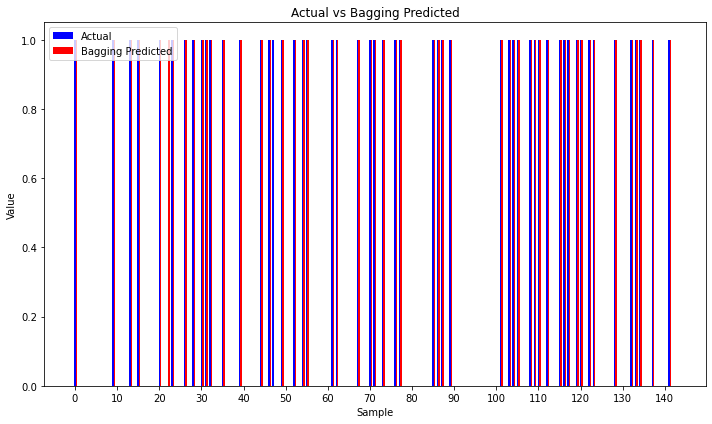

In [28]:
# Generate an array of indices for the samples
indices = np.arange(len(y_test))

# Set the width of the bars
bar_width = 0.35

# Select every nth index for displaying as x-axis labels
label_indices = indices[::10]

plt.figure(figsize=(10, 6))
plt.bar(indices, y_test, bar_width, color='blue', label='Actual')
plt.bar(indices + bar_width, y_pred, bar_width, color='red', label='Bagging Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs Bagging Predicted')
plt.xticks(label_indices, label_indices)
plt.legend()
plt.tight_layout()
plt.show()

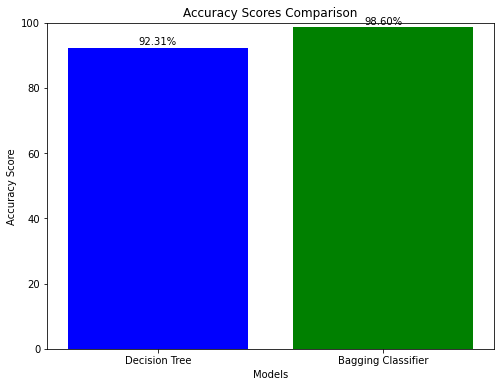

In [29]:
# Accuracy scores
accuracy_scores = [accuracy_score(y_test, dt_pred) * 100, accuracy * 100]

# Model names
model_names = ['Decision Tree', 'Bagging Classifier']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores Comparison')
plt.ylim(0, 100)

# Add value labels to the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', color='black')

# Show the plot
plt.show()


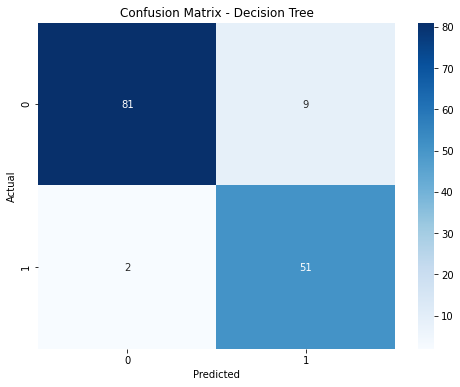

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, dt_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

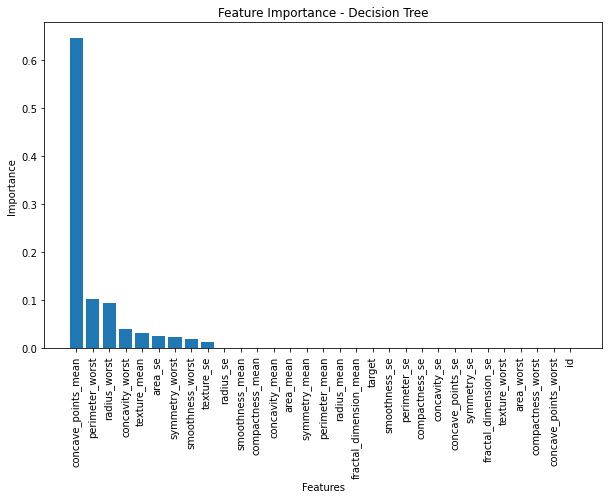

In [31]:
# Feature importance
feature_importance = DT.feature_importances_
feature_names = X.columns

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_names = feature_names[sorted_idx]

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx])
plt.xticks(range(len(feature_importance)), sorted_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.show()


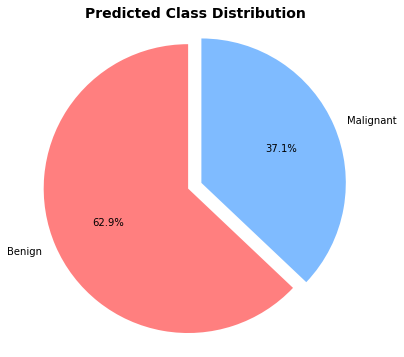

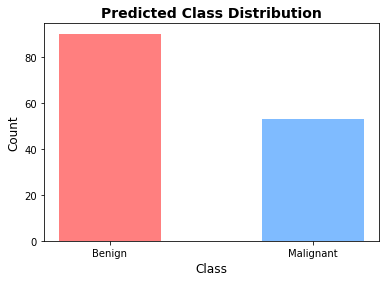

In [32]:
# Count the occurrences of each class in y_pred
unique, counts = np.unique(y_pred, return_counts=True)
class_counts = dict(zip(unique, counts))

# Customization options
colors = ['#FF7F7F', '#7FBBFF']  # Custom colors for the pie chart and bar graph
explode = (0.1, 0)  # Explode the first slice (benign) in the pie chart
bar_width = 0.5  # Custom width of the bars in the bar graph

# Pie chart
plt.figure(figsize=(6, 6))
labels = ['Benign', 'Malignant']
plt.pie(class_counts.values(), labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Predicted Class Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

# Bar graph
plt.figure(figsize=(6, 4))
plt.bar(labels, class_counts.values(), color=colors, width=bar_width)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Predicted Class Distribution', fontsize=14, fontweight='bold')
plt.show()

In [33]:
bagging_model = BaggingClassifier(base_estimator=KNN, n_estimators=10, random_state=0)
bagging_model.fit(X_train, y_train)
y_pred = bagging_model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score of the ensemble model is {accuracy * 100:.2f}%')

Accuracy score of the ensemble model is 75.52%


In [35]:
bagging_model = BaggingClassifier(base_estimator=lr, n_estimators=10, random_state=0)
bagging_model.fit(X_train, y_train)
y_pred = bagging_model.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score of the ensemble model is {accuracy * 100:.2f}%')

Accuracy score of the ensemble model is 62.94%


In [37]:
bagging_model = BaggingClassifier(base_estimator=svm, n_estimators=10, random_state=0)
bagging_model.fit(X_train, y_train)
y_pred = bagging_model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score of the ensemble model is {accuracy * 100:.2f}%')

Accuracy score of the ensemble model is 62.94%


In [39]:
bagging_model = BaggingClassifier(base_estimator=rf, n_estimators=10, random_state=0)
bagging_model.fit(X_train, y_train)
y_pred = bagging_model.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score of the ensemble model is {accuracy * 100:.2f}%')

Accuracy score of the ensemble model is 95.80%


In [41]:
bagging_model = BaggingClassifier(base_estimator=xgb, n_estimators=10, random_state=0)
bagging_model.fit(X_train, y_train)
y_pred = bagging_model.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score of the ensemble model is {accuracy * 100:.2f}%')

Accuracy score of the ensemble model is 95.10%


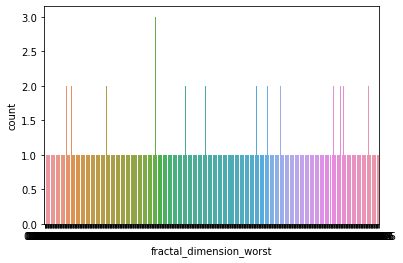

In [43]:
# Count the target class
sns.countplot(x='fractal_dimension_worst', data=data)
plt.show()

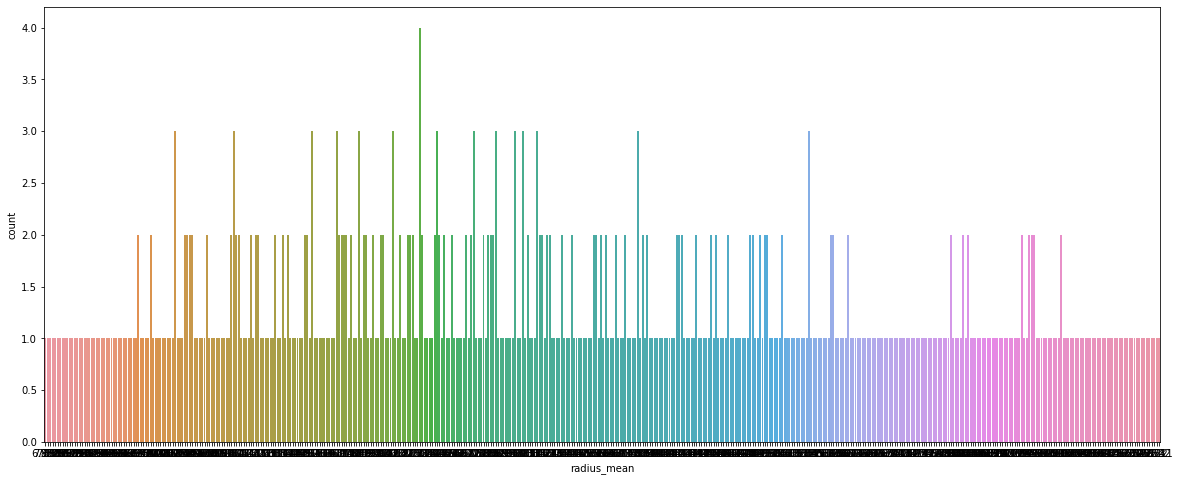

In [44]:
# counter plot of feature mean radius
plt.figure(figsize=(20, 8))
sns.countplot(x='radius_mean', data=data)
plt.show()

In [45]:
data.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,target
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,NaN
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave_points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN


<AxesSubplot:>

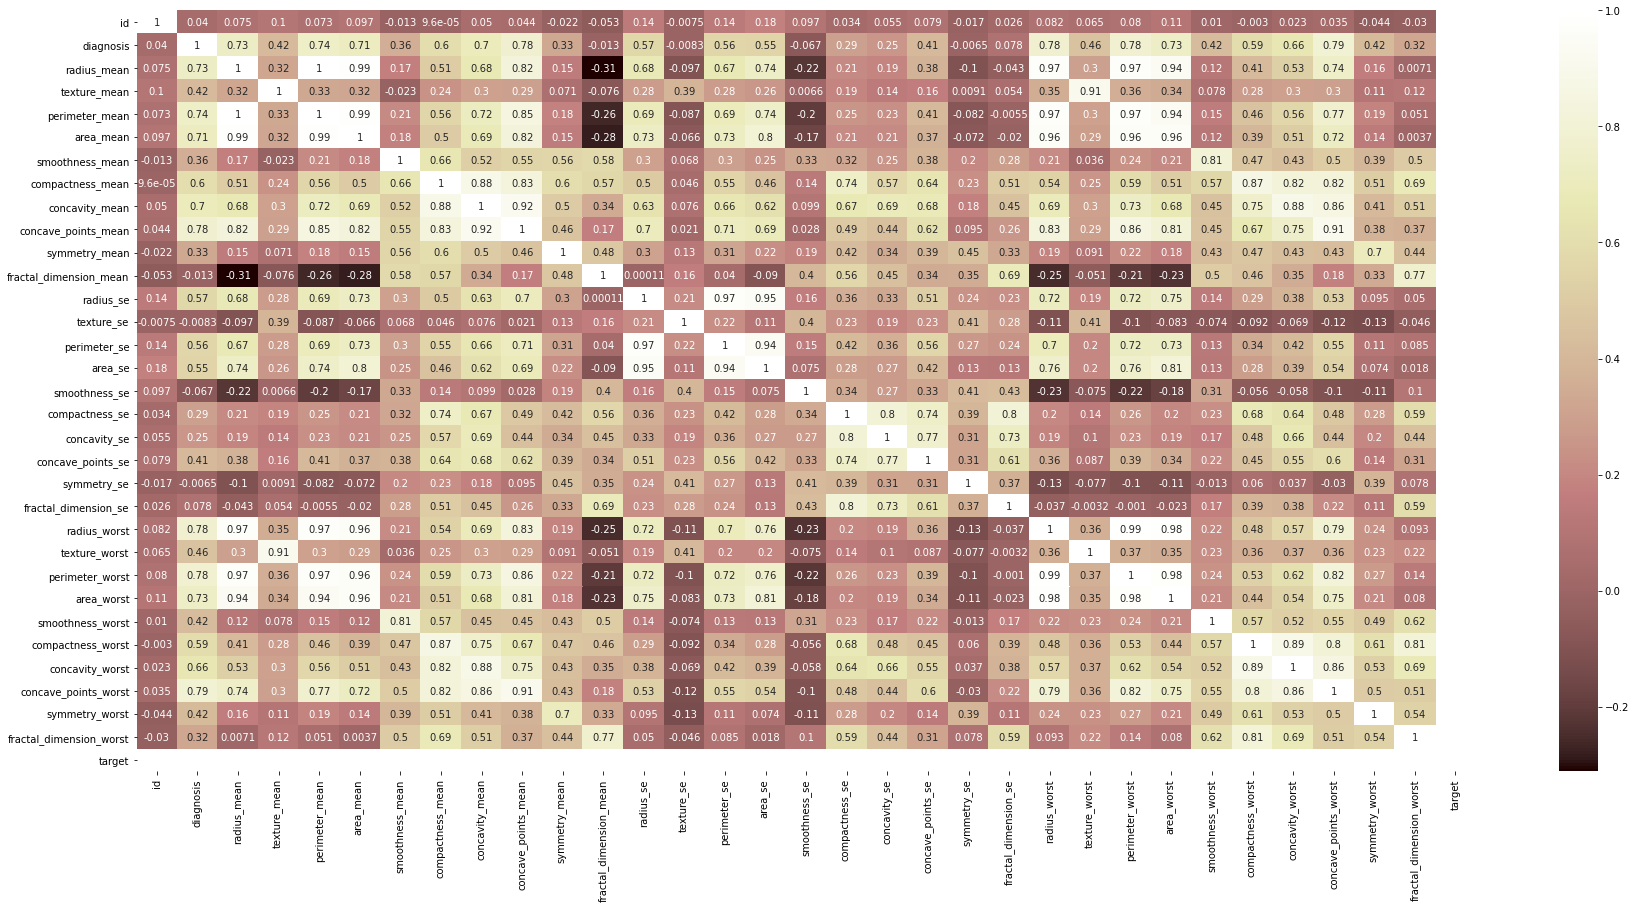

In [46]:
plt.figure(figsize=(30,14))
sns.heatmap(data.corr(),annot=True,cmap='pink')

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

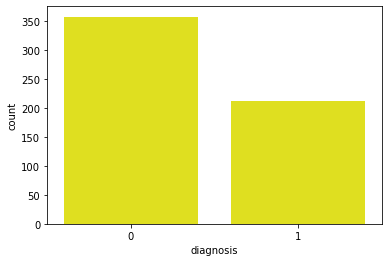

In [47]:
sns.countplot(x='diagnosis',data=data,color='yellow')

<AxesSubplot:xlabel='id', ylabel='radius_mean'>

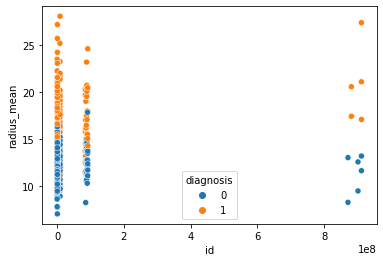

In [48]:
sns.scatterplot(x='id',y='radius_mean',data=data,hue='diagnosis')

<AxesSubplot:xlabel='id', ylabel='texture_mean'>

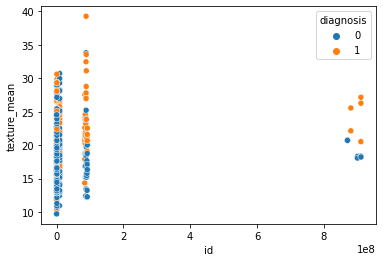

In [49]:
sns.scatterplot(x='id',y='texture_mean',data=data,hue='diagnosis')

C:\Users\navya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='perimeter_mean', ylabel='Density'>

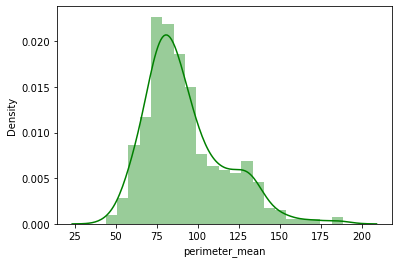

In [50]:
sns.distplot(data.perimeter_mean,kde=True,color='g')

C:\Users\navya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area_mean'>

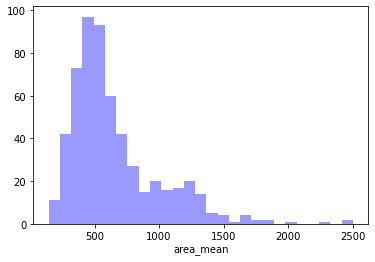

In [51]:
sns.distplot(data.area_mean,kde=False,color='b')

<AxesSubplot:xlabel='id', ylabel='smoothness_mean'>

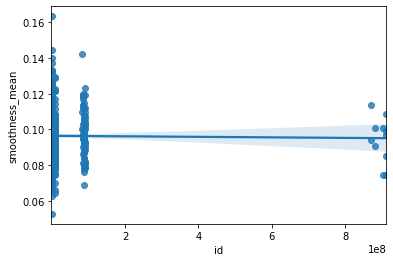

In [52]:
sns.regplot(x='id',y='smoothness_mean',data=data)

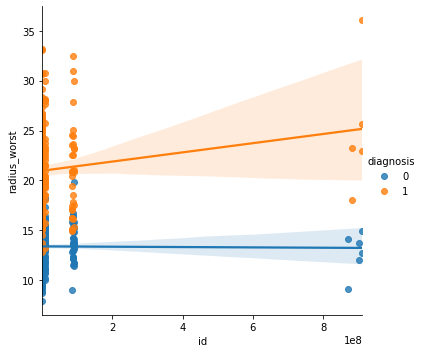

In [53]:
sns.lmplot(x='id',y='radius_worst',data=data,hue='diagnosis')

C:\Users\navya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='perimeter_worst', ylabel='Density'>

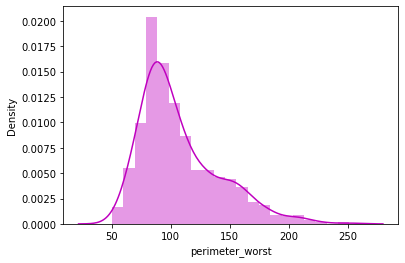

In [54]:
sns.distplot(data['perimeter_worst'],kde=True,color='m')

<AxesSubplot:xlabel='id', ylabel='area_worst'>

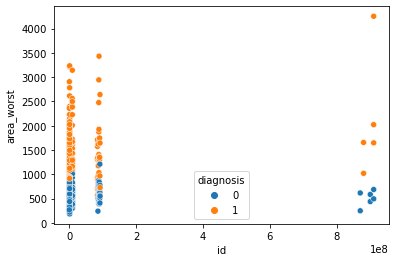

In [55]:
sns.scatterplot(x='id',y='area_worst',data=data,hue='diagnosis')

<AxesSubplot:xlabel='id', ylabel='smoothness_worst'>

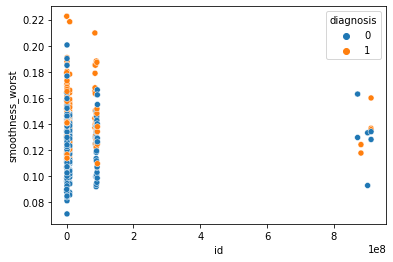

In [56]:
sns.scatterplot(x='id',y='smoothness_worst',data=data,hue='diagnosis')

In [57]:
# Perform classification using LogisticRegression on the new data
lr = LogisticRegression()

In [58]:
lr.fit(X_train, y_train)

LogisticRegression()

In [59]:
tfidf_vectorizer = TfidfVectorizer()
# Training data for text features
train_text = data.loc[X_train.index, 'fractal_dimension_worst'].astype(str)
train_df = pd.DataFrame({'diagnosis': y_train})
train_text_filtered = train_text[train_df.index]
train_tfidf_model = tfidf_vectorizer.fit_transform(train_text_filtered)

# Testing data for text features
test_text = data.loc[X_test.index, 'fractal_dimension_worst'].astype(str)
test_df = pd.DataFrame({'diagnosis': y_test})
test_text_filtered = test_text[test_df.index]
test_tfidf_model = tfidf_vectorizer.transform(test_text_filtered)

# Print the shape of the TF-IDF transformed features
print("Train TF-IDF Model Shape:", train_tfidf_model.shape)
print("Test TF-IDF Model Shape:", test_tfidf_model.shape)
# Print the shape of the target labels
print("Train Target Shape:", train_df.shape)
print("Test Target Shape:", test_df.shape)

Train TF-IDF Model Shape: (426, 404)
Test TF-IDF Model Shape: (143, 404)
Train Target Shape: (426, 1)
Test Target Shape: (143, 1)


In [60]:
# lr_yhat = lr.predict(test_tfidf_model)

In [61]:
cls = [LogisticRegression()]
cls_name = []

In [62]:
accuracy = []
for cl in cls:
    model = cl.fit(train_tfidf_model, train_df.values.ravel())  # Use train_df.values.ravel() to convert DataFrame to a 1D array
    lbl_pred = model.predict(test_tfidf_model)
    a = round(100 * accuracy_score(lbl_pred, test_df.values.ravel()), 2)  # Use test_df.values.ravel() for accuracy_score
    accuracy.append(a)
    cls_name.append(cl.__class__.__name__)
    print("{} Accuracy Score: {}%".format(cl.__class__.__name__, a))
    print(classification_report(lbl_pred, test_df.values.ravel()))

LogisticRegression Accuracy Score: 62.94%
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       143
           1       0.00      0.00      0.00         0

    accuracy                           0.63       143
   macro avg       0.50      0.31      0.39       143
weighted avg       1.00      0.63      0.77       143



C:\Users\navya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\navya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\navya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


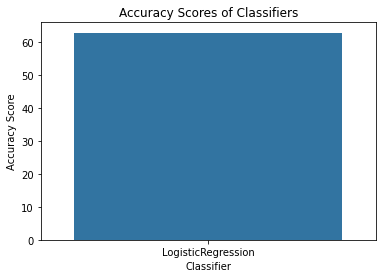

In [63]:
sns.barplot(x=cls_name, y=accuracy)
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Classifiers')
plt.show()

In [64]:
cls = [RandomForestClassifier(n_estimators=200), LogisticRegression()]
cls_name = []

In [65]:
i = 0
accuracy = []
for cl in cls:
    model = cl.fit(train_tfidf_model, train_df['diagnosis'])
    lbl_pred = model.predict(test_tfidf_model)
    lbl_actual = test_df['diagnosis']  # Define lbl_actual before using it
    a = round(100 * accuracy_score(lbl_pred, lbl_actual), 2)
    accuracy.append(a)
    cls_name.append(cl.__class__.__name__)
    print("{} Accuracy Score: {}%".format(cls_name[i], a))
    print(classification_report(lbl_pred, lbl_actual))
    i += 1

RandomForestClassifier Accuracy Score: 62.94%
              precision    recall  f1-score   support

           0       0.96      0.64      0.76       135
           1       0.08      0.50      0.13         8

    accuracy                           0.63       143
   macro avg       0.52      0.57      0.45       143
weighted avg       0.91      0.63      0.73       143

LogisticRegression Accuracy Score: 62.94%
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       143
           1       0.00      0.00      0.00         0

    accuracy                           0.63       143
   macro avg       0.50      0.31      0.39       143
weighted avg       1.00      0.63      0.77       143



C:\Users\navya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\navya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\navya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
# Convert target variable to binary values (0 and 1)
data['target'] = (data['target'] == 1).astype(int)

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [67]:
# Define the parameter grid for hyperparameter search
param_grid = {
'max_depth': [3, 5, 7], # Maximum depth of the tree
'min_samples_split': [5, 10, 15], # Minimum number of samples required to split an internal node
'min_samples_leaf': [2, 4, 6] # Minimum number of samples required to be at a leaf node
}

In [68]:
# Create the decision tree classifier
dt = DecisionTreeClassifier(criterion='entropy')
#Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
#Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [69]:
#Evaluate the model with best hyperparameters on the test set
best_model = grid_search.best_estimator_
dt_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, dt_pred)
accuracy_percentage = accuracy * 100  # Convert accuracy to percentage
print("Accuracy: {:.2f}%".format(accuracy_percentage))

Accuracy: 100.00%
